In [ ]:
# list data structures
# A
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

<function matplotlib.pyplot.show(*args, **kw)>

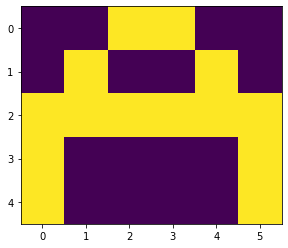

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(a).reshape(5,6))
plt.show

In [ ]:
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]

y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

In [ ]:
def forward(x, w1, w2):
  # layer 1
  z1 = x.dot(w1)
  a1 = sigmoid(z1)

  # layer 2
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  return a2

In [ ]:
def init(x, y):
  l = []
  for i in range(x*y):
    l.append(np.random.randn())
  return np.array(l).reshape(x,y)

In [ ]:
def loss(yh, y):
  s = (np.square(yh - y))
  s = np.sum(s) / len(y)
  return (s)

In [ ]:
def backward(x, y, w1, w2, lr):
  yh = forward(x, w1, w2)
  
  # layer 1
  z1 = x.dot(w1)
  a1 = sigmoid(z1)

  # layer 2
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  d2 = a2-y
  d_sig = np.multiply(a1, 1-a1)
  d1 = np.multiply((w2.dot(d2.transpose())).transpose(), d_sig)

  w1_grad = x.transpose().dot(d1)
  w2_grad = a1.transpose().dot(d2)

  w1 -= lr*w1_grad
  w2 -= lr*w2_grad

  return (w1, w2)

In [ ]:
def train(x, y, w1, w2, lr=1e-2, epoch=10):
  acc = []
  loss = []
  
  for e in range(epoch):
      l = []
      for i in range(len(x)):
        yh = forward(x[i], w1, w2)
        l.append((loss(yh, y[i])))
        w1, w2 = backward(x[i], y[i], w1, w2, lr)
      ls = (sum(l))/(len(x))
      ac = (1-(sum(l))/(len(x)))*100
      print("epoch: ", e+1, "     acc: ", ac)
      acc.append(ac)
      loss.append(ls)
      return (acc, loss, w1, w2)

In [ ]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = backward(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

In [ ]:
def predict(x, w1, w2):
  yh = forward(x, w1, w2)
  max = 0
  k= 0
  for i in range(len(yh[0])):
    if (max<yh[0][i]):
      max = yh[0][i]
      k = i
    
  if(k == 0):
      print("Image is of letter A.")
  elif(k == 1):
      print("Image is of letter B.")
  else:
      print("Image is of letter C.")

  plt.imshow(x.reshape(5,6))
  plt.show()

In [ ]:
w1 = init(30, 5) # 5x6 flat input
w2 = init(5, 3) # 5 connect and 3 out classes
print(w1, "\n\n", w2)

[[ 2.29750581e+00 -5.28408982e-01  4.32512392e-01 -2.60161353e+00
   5.92680212e-01]
 [-3.75353678e-01  9.80655782e-02  1.29421592e+00 -5.95486818e-01
   2.11218052e-01]
 [ 7.50879906e-01 -8.80261410e-01  1.81033081e-01  8.69988500e-01
   1.07793416e+00]
 [ 6.51864820e-01  1.96298907e+00 -1.43960541e-01  1.87148683e-01
   8.80430925e-01]
 [-5.42727379e-01  2.13613098e+00 -7.28076016e-01  6.51828825e-01
  -3.05518533e+00]
 [ 2.45417365e-03  1.50129377e+00 -5.25493816e-01 -7.71849156e-01
   6.76106300e-01]
 [ 2.08705586e+00 -1.63059106e+00 -3.51061521e-01  1.36106827e-03
   2.90671376e-01]
 [ 6.31550584e-01  1.72662759e+00 -6.87228128e-01 -6.31303069e-01
  -5.00629921e-02]
 [ 8.75420808e-02 -1.34031278e+00 -5.70043434e-01 -1.06699183e+00
   2.29321289e+00]
 [-1.14039076e+00  1.38001879e-01 -8.87998340e-01 -1.62052968e+00
   1.49980131e+00]
 [-1.57908029e+00 -2.29715438e-01  7.54287331e-01 -7.28476918e-02
  -7.51605096e-01]
 [ 6.84929535e-01  1.39460718e+00 -9.05456697e-01  9.92759054e-01

In [ ]:
acc, loss, w1, w2 = train(x, y, w1, w2, 1e-1, 100)

epochs: 1 ======== acc: 71.43780459027329
epochs: 2 ======== acc: 74.22037777821515
epochs: 3 ======== acc: 76.52139231810791
epochs: 4 ======== acc: 78.24598307781982
epochs: 5 ======== acc: 79.47124512342508
epochs: 6 ======== acc: 80.33841023946856
epochs: 7 ======== acc: 80.97380452756371
epochs: 8 ======== acc: 81.46770511755037
epochs: 9 ======== acc: 81.87917595550927
epochs: 10 ======== acc: 82.24570036849215
epochs: 11 ======== acc: 82.59086733409899
epochs: 12 ======== acc: 82.92933760727657
epochs: 13 ======== acc: 83.26979241306893
epochs: 14 ======== acc: 83.61665003549881
epochs: 15 ======== acc: 83.97114766362036
epochs: 16 ======== acc: 84.33218583501049
epochs: 17 ======== acc: 84.69713810147238
epochs: 18 ======== acc: 85.06264921546578
epochs: 19 ======== acc: 85.42533020956836
epochs: 20 ======== acc: 85.78224622444183
epochs: 21 ======== acc: 86.13115885346869
epochs: 22 ======== acc: 86.47056230786266
epochs: 23 ======== acc: 86.79959221190512
epochs: 24 ======== 

<function matplotlib.pyplot.show(*args, **kw)>

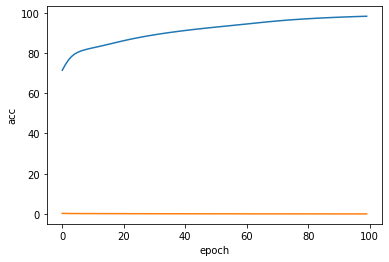

In [ ]:
plt.plot(acc)
plt.ylabel("acc")
plt.xlabel("epoch")
plt.show

plt.plot(loss)
plt.ylabel("acc")
plt.xlabel("epoch")
plt.show

In [ ]:
print(w1, "\n", w2)

[[ 2.29750581e+00 -5.28408982e-01  4.32512392e-01 -2.60161353e+00
   5.92680212e-01]
 [-3.34884361e-01  7.90527068e-02  1.03488676e+00 -4.31080983e-01
   6.34407544e-02]
 [ 1.01645321e+00 -8.35122171e-01  3.88918771e-01  6.75757677e-01
   9.39286577e-01]
 [ 9.17438123e-01  2.00812831e+00  6.39251489e-02 -7.08213983e-03
   7.41783337e-01]
 [-5.02258062e-01  2.11711811e+00 -9.87405168e-01  8.16234660e-01
  -3.20296263e+00]
 [ 2.45417365e-03  1.50129377e+00 -5.25493816e-01 -7.71849156e-01
   6.76106300e-01]
 [ 2.08705586e+00 -1.63059106e+00 -3.51061521e-01  1.36106827e-03
   2.90671376e-01]
 [ 8.97123886e-01  1.77176683e+00 -4.79342438e-01 -8.25533892e-01
  -1.88710580e-01]
 [ 8.75420808e-02 -1.34031278e+00 -5.70043434e-01 -1.06699183e+00
   2.29321289e+00]
 [-1.14039076e+00  1.38001879e-01 -8.87998340e-01 -1.62052968e+00
   1.49980131e+00]
 [-2.10878484e+00 -1.35920896e-01  1.24265273e+00 -4.95704280e-01
  -1.08588778e-01]
 [ 6.84929535e-01  1.39460718e+00 -9.05456697e-01  9.92759054e-01

Image is of letter B.


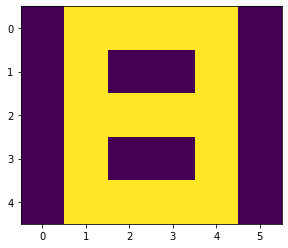

In [ ]:
predict(x[1], w1, w2)